# Sentiment Flow – Understanding Twitter Sentiment on Apple and Google Products

## Introduction
In an era where public opinion on products can influence brand perception, companies increasingly rely on sentiment analysis to capture real-time customer feedback. This project aims to classify Twitter sentiment related to Apple and Google products. By using sentiment polarity classification, this analysis seeks to provide actionable insights into customer satisfaction and emerging issues, helping brands like Apple and Google make data-driven decisions regarding product improvements, customer support strategies, and marketing efforts.

## Business Understanding
This project focuses on classifying the sentiment of tweets concerning Apple and Google products. Through sentiment polarity classification, we aim to provide insights that aid in understanding customer satisfaction, identifying issues, and informing strategic responses.

#### 1. Problem Statement: 
We aim to classify tweet sentiments as positive, negative, or neutral, providing insights into public perception of Apple and Google products.

#### 2. Audience: 
The primary stakeholders are the product, marketing, and customer support teams at Apple and Google.

#### 3. Impact: 
The sentiment analysis results will enable Apple and Google to better understand customer opinions, proactively address issues, and enhance product development and customer engagement.

#### 2. Stakeholders (by Angela)
1. The companies: Apple & Google- Considering these companies are direcly affected by the sentiment, it is important for them to gauge the perception of their products so as to identify the areas of improvement.

2. Marketing teams- this sentiment analysis and model can help them respond to negative feedback, adjust their marketing campaigns and highlight the positive aspects of their products.

3. The customer support teams &decision makers- the sentiment analysis is important for they can use it to improve product development, customer support and brand reputation.


## Data Understanding
This dataset was sourced from CrowdFlower (via data.world) and includes user-assessed sentiment for tweets about Apple and Google products.

## Data Understanding (Angela's suggestion)

The dataset, sourced from CrowdFlower via data.world, consists of tweets where contributors evaluated the sentiment expressed toward different brands and products. Each tweet is annotated based on the sentiment (positive, negative, or neutral) and, where applicable, the specific brand or product the sentiment is directed at.

### Data Suitability
This dataset is well-suited to our project for several reasons:

1. Relevance: The data focuses on sentiments toward brands and products, aligning closely with our objective of analyzing Twitter sentiment specifically for Apple and Google products.

2. Real-World Context: The tweets reflect genuine user opinions, adding practical value to our sentiment analysis project.

3. Multiclass Capability: With sentiment labels as positive, negative, and neutral, the dataset enables us to develop both binary (positive/negative) and multiclass (positive/negative/neutral) classification models.

3. Dataset Composition
The dataset includes over 9,000 labeled tweets, allowing for a comprehensive exploration of sentiment distribution and linguistic patterns.


### Feature Selection
The tweet content is our primary feature, while the sentiment and target brand/product labels are essential for building and evaluating our classifiers.



### 1. Load the Dataset

In [1]:
import pandas as pd

# Load the dataset
file_path = 'judge_tweet_product_company.csv'

# Our dataset contains special characters or a non-standard encoding.
# We solved this by reading the file using different encoding "ISO-8859-1"
data = pd.read_csv(file_path, encoding='ISO-8859-1')

# Display the first few rows to understand the structure
data.head()


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


#### 1.1 Dataset Preview:

Key columns in this dataset:
- tweet_text: The actual tweet content.
- emotion_in_tweet_is_directed_at: Indicates the brand or product mentioned.
- is_there_an_emotion_directed_at_a_brand_or_product: Specifies the sentiment (positive, negative, or neutral).


### Descriptive Features (Angela's suggestion)
The dataset contains the following key features:

1. tweet_text: The actual tweet content.
2. is_there_an_emotion_directed_at_a_brand_or_product: A label indicating sentiment - either no emotion, positive, negative, or unclear.
3. emotion_in_tweet_is_directed_at: Specifies the brand or product targeted by the sentiment.


### 2. Exploratory Data Analysis

#### ( Angela's suggestion : to print columns with their unique values )

In [2]:
# Checking data types, missing values, and summary statistics for initial exploration
data_info = data.info()
missing_values = data.isnull().sum()
basic_statistics = data.describe(include='all')

# Displaying the results
data_info, missing_values, basic_statistics


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


(None,
 tweet_text                                               1
 emotion_in_tweet_is_directed_at                       5802
 is_there_an_emotion_directed_at_a_brand_or_product       0
 dtype: int64,
                                                tweet_text  \
 count                                                9092   
 unique                                               9065   
 top     RT @mention Marissa Mayer: Google Will Connect...   
 freq                                                    5   
 
        emotion_in_tweet_is_directed_at  \
 count                             3291   
 unique                               9   
 top                               iPad   
 freq                               946   
 
        is_there_an_emotion_directed_at_a_brand_or_product  
 count                                                9093  
 unique                                                  4  
 top                    No emotion toward brand or product  
 freq                    

#### 2.1 Data Summary
#####  - Dataset Size: 
9,093 tweets, each with sentiment labels.

#####  - Columns:
- tweet_text: Contains unique tweets, with 9,065 unique entries.
- emotion_in_tweet_is_directed_at: Specifies the product/brand targeted in the tweet (3,291 non-null values, so 5,802 entries are missing here).
- is_there_an_emotion_directed_at_a_brand_or_product: Indicates sentiment with four categories: Positive, Negative, Neutral, or No emotion toward brand or product.

#####  - Data Quality Observations:
- Missing values in emotion_in_tweet_is_directed_at need handling, either through imputation or filtering.
- Class imbalance in is_there_an_emotion_directed_at_a_brand_or_product, with "No emotion" being the most frequent label.

#### 2.2 Sentiment Distribution and Targeted Brands

- Sentiment Distribution: We visualized the distribution of sentiment labels to confirm the class imbalance.
- Targeted Brand Analysis: We also identified the distribution of Apple vs. Google mentions.


#### Angela's Suggestion (to do this after cleaning under visualizations)

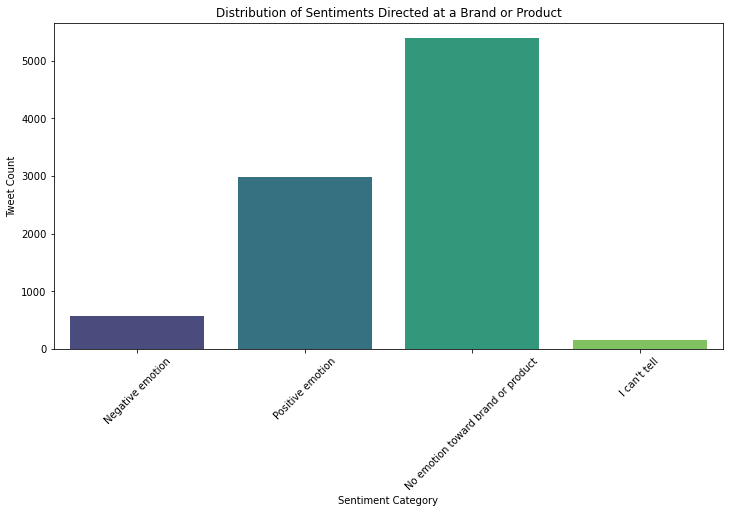

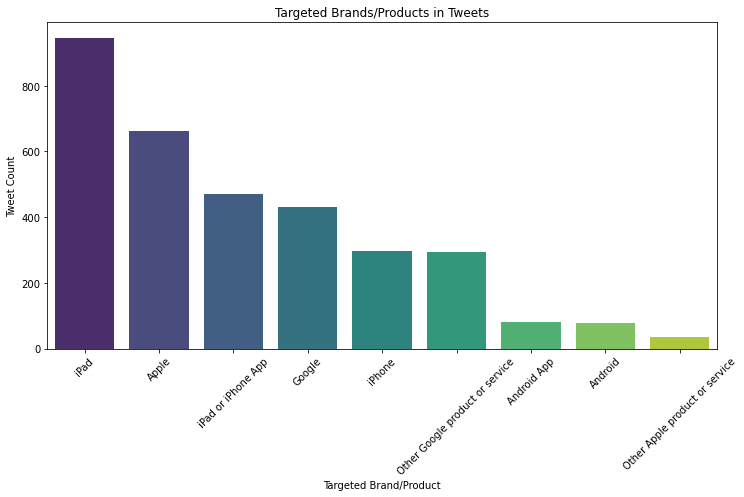

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting sentiment distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='is_there_an_emotion_directed_at_a_brand_or_product', palette="viridis")
plt.title('Distribution of Sentiments Directed at a Brand or Product')
plt.xlabel('Sentiment Category')
plt.ylabel('Tweet Count')
plt.xticks(rotation=45)
plt.show()

# Plotting targeted brands/products
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='emotion_in_tweet_is_directed_at', palette="viridis", 
              order=data['emotion_in_tweet_is_directed_at'].value_counts().index)
plt.title('Targeted Brands/Products in Tweets')
plt.xlabel('Targeted Brand/Product')
plt.ylabel('Tweet Count')
plt.xticks(rotation=45)
plt.show()


### 3. Text Preprocessing Needs: 
We will examine tweet samples to determine necessary cleaning steps, such as removing URLs, special characters, etc.

#### 3.1 Viewing Sample Text Data

In [4]:
# Display a sample of tweets to visually inspect for any common patterns
data['tweet_text'].sample(10, random_state=1)


254     iPad 2 vs Android vs The World : Panel at #SXS...
2450    &quot;iPad Design Headaches (2 Tablets, Call i...
5772    RT @mention Get it while it's hot! Latest vers...
3813             Win free ipad 2 from webdoc.com #sxsw RT
3427    Apple to have a pop-up store at South by South...
8431           Just saw the Google Streetvview car. #sxsw
1956    DL the #Calyp App today! Avail in the iTunes A...
1145    View from the back of the line to get into Lea...
5519    RT @mention At #SXSW? Your mission is to downl...
4277    Google's Marissa Mayer Says Location Is Everyt...
Name: tweet_text, dtype: object

#### 3.2 Checking for URLs, Hashtags, and Mentions
From the sample tweets, there seems to be hashtags (#) and mentions (@). Let's proceed to check for them in the dataset. They are irrelevant to sentiment and need to be removed

In [5]:
import re

# Check for URLs in tweets
data['has_url'] = data['tweet_text'].apply(lambda x: bool(re.search(r'http[s]?://', str(x))))
print("Tweets with URLs:", data['has_url'].sum())

# Check for hashtags in tweets
data['has_hashtag'] = data['tweet_text'].apply(lambda x: bool(re.search(r'#\w+', str(x))))
print("Tweets with hashtags:", data['has_hashtag'].sum())

# Check for mentions in tweets
data['has_mention'] = data['tweet_text'].apply(lambda x: bool(re.search(r'@\w+', str(x))))
print("Tweets with mentions:", data['has_mention'].sum())


Tweets with URLs: 25
Tweets with hashtags: 9086
Tweets with mentions: 4919


The results suggest that our dataset has a significant number of hashtags (9,086), mentions (4,919), and a smaller number of URLs (25) which need to be removed during data cleaning.

#### 3.3 Checking for Special Characters or Numbers

In [6]:
# Check for special characters and numbers
data['has_special_chars'] = data['tweet_text'].apply(lambda x: bool(re.search(r'[^a-zA-Z\s]', str(x))))
print("Tweets with special characters or numbers:", data['has_special_chars'].sum())


Tweets with special characters or numbers: 9092


There are significant special characters or numbers in our text. We need to clean out any extraneous characters that don't contribute to sentiment.

#### 3.4 Examining Text Length
Short tweets may lack sufficient context for sentiment analysis, while overly long ones could indicate issues with text truncation or noise.

In [7]:
# We had 1 missing value in the tweet_text column which is a float and do not have a length. 
# Let's replace it with an empty string to avoid an error

# Replace NaN values in 'tweet_text' with an empty string
data['tweet_text'] = data['tweet_text'].fillna("")

# Check the length of each tweet
data['text_length'] = data['tweet_text'].apply(len)
print(data['text_length'].describe())



count    9093.000000
mean      104.972176
std        27.207614
min         0.000000
25%        86.000000
50%       109.000000
75%       126.000000
max       178.000000
Name: text_length, dtype: float64


The mean and median tweet lengths are close, indicating a roughly normal distribution of tweet lengths, with most tweets falling between 86 and 126 characters.

## Data Cleaning